In [74]:
import pandas as pd
import matplotlib.pyplot as plt

In [75]:
mimic_train = pd.read_csv("train_data.csv")

In [76]:
mimic_train

,hadm_id,gender,age,LOSdays,admit_type,admit_location,AdmitDiagnosis,insurance,religion,marital_status,...,NumMicroLabs,NumNotes,NumOutput,NumRx,NumProcEvents,NumTransfers,NumChartEvents,ExpiredHospital,TotalNumInteract,LOSgroupNum
0,192223,M,0,2.08,NEWBORN,PHYS REFERRAL/NORMAL DELI,NEWBORN,Private,CATHOLIC,SINGLE,...,0.00,1.15,0.00,0.00,0.00,1.92,17.31,0,26.14,0
1,157693,M,25,4.54,EMERGENCY,EMERGENCY ROOM ADMIT,PARTIAL SMALL BOWEL OBSTRUCTION,Self Pay,CATHOLIC,SINGLE,...,0.00,0.34,0.44,11.89,0.00,1.32,297.36,0,359.14,1
2,114856,F,52,5.21,ELECTIVE,PHYS REFERRAL/NORMAL DELI,CORONARY ARTERY DISEASE\CORONARY ARTERY BYPASS...,Private,CATHOLIC,MARRIED,...,0.38,0.33,8.83,16.89,2.69,0.77,313.24,0,406.29,1
3,178280,F,66,10.25,ELECTIVE,PHYS REFERRAL/NORMAL DELI,CORONARY ARTERY DISEASE\AORTIC VALVE REPLACEME...,Medicare,PROTESTANT QUAKER,WIDOWED,...,3.71,0.08,0.00,0.00,0.00,0.59,0.00,0,5.65,2
4,179752,F,80,10.04,EMERGENCY,EMERGENCY ROOM ADMIT,BLUNT TRAUMA,Private,UNOBTAINABLE,SINGLE,...,2.79,0.30,5.48,9.76,0.00,0.30,411.75,0,495.03,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47176,122150,M,65,13.71,EMERGENCY,EMERGENCY ROOM ADMIT,HYPERTENSIVE URGENCY;ACUTE CORONARY SYNDROME,Private,UNOBTAINABLE,MARRIED,...,0.00,0.18,9.77,8.39,0.00,0.58,508.46,0,608.86,3
47177,102646,M,56,7.13,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,UPPER GI BLEED,Medicare,NOT SPECIFIED,MARRIED,...,1.12,0.24,3.09,7.29,0.00,0.56,236.33,0,312.01,1
47178,102214,M,44,3.50,EMERGENCY,EMERGENCY ROOM ADMIT,SUBMANDIBULAR ABSCESS,Private,CATHOLIC,SINGLE,...,1.43,0.82,7.14,11.71,0.00,0.86,483.71,0,560.81,0
47179,171573,F,52,10.79,EMERGENCY,CLINIC REFERRAL/PREMATURE,PNEUMONIA;RAPID AF;HYPOXIA,Medicare,CATHOLIC,SINGLE,...,1.30,0.16,5.00,14.55,1.02,0.28,341.61,0,422.96,2


In [77]:
pd.unique(mimic_train.AdmitDiagnosis).size

13059

In [78]:
pd.unique(mimic_train.AdmitProcedure).size

1215

In [79]:
#continuous_figures, continuous_axes = plt.subplots(14, figsize = (16, 8))

In [80]:
mimic_train.columns

Index(['hadm_id', 'gender', 'age', 'LOSdays', 'admit_type', 'admit_location',
       'AdmitDiagnosis', 'insurance', 'religion', 'marital_status',
       'ethnicity', 'NumCallouts', 'NumDiagnosis', 'NumProcs',
       'AdmitProcedure', 'NumCPTevents', 'NumInput', 'NumLabs', 'NumMicroLabs',
       'NumNotes', 'NumOutput', 'NumRx', 'NumProcEvents', 'NumTransfers',
       'NumChartEvents', 'ExpiredHospital', 'TotalNumInteract', 'LOSgroupNum'],
      dtype='object')

In [81]:
#plt.figure(figsize = (15, 8))
#plt.plot(mimic_train.age, mimic_train.LOSdays, 'bo')
#plt.xlabel('Age (Years)')
#plt.ylabel('Length of Stay (Days)')

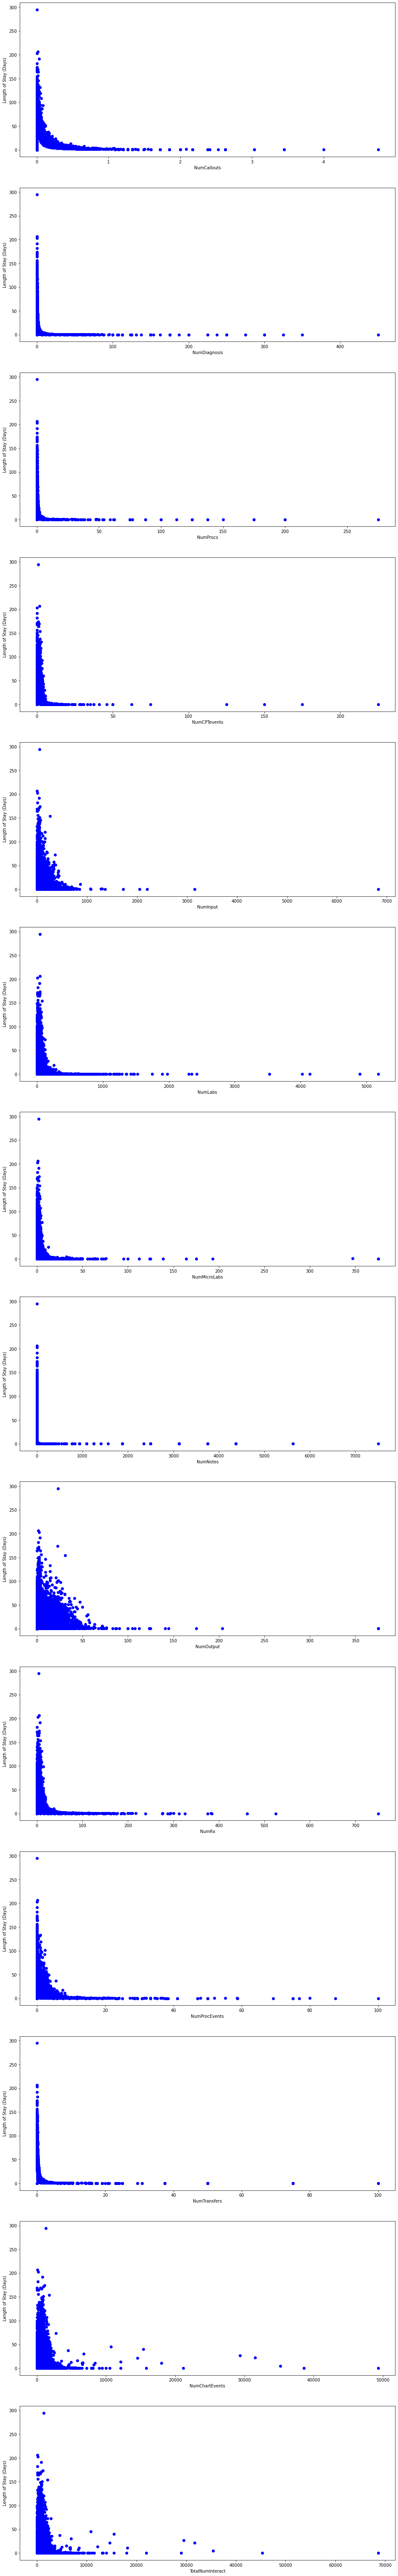

In [82]:
continuous_variables = ['NumCallouts', 'NumDiagnosis', 'NumProcs', 'NumCPTevents', 'NumInput', 'NumLabs', 'NumMicroLabs',
                        'NumNotes', 'NumOutput', 'NumRx', 'NumProcEvents', 'NumTransfers', 'NumChartEvents', 'TotalNumInteract']

continuous_figures, continuous_axes = plt.subplots(14, figsize = (16, 112)) # 8 * 14 = 112
for counter in range(14):
    continuous_axes[counter].plot(mimic_train[continuous_variables[counter]], mimic_train.LOSdays, 'bo')
    continuous_axes[counter].set_xlabel(continuous_variables[counter])
    continuous_axes[counter].set_ylabel("Length of Stay (Days)")

In [83]:
pd.unique(mimic_train.AdmitDiagnosis).size

13059

In [84]:
pd.unique(mimic_train.AdmitProcedure).size

1215

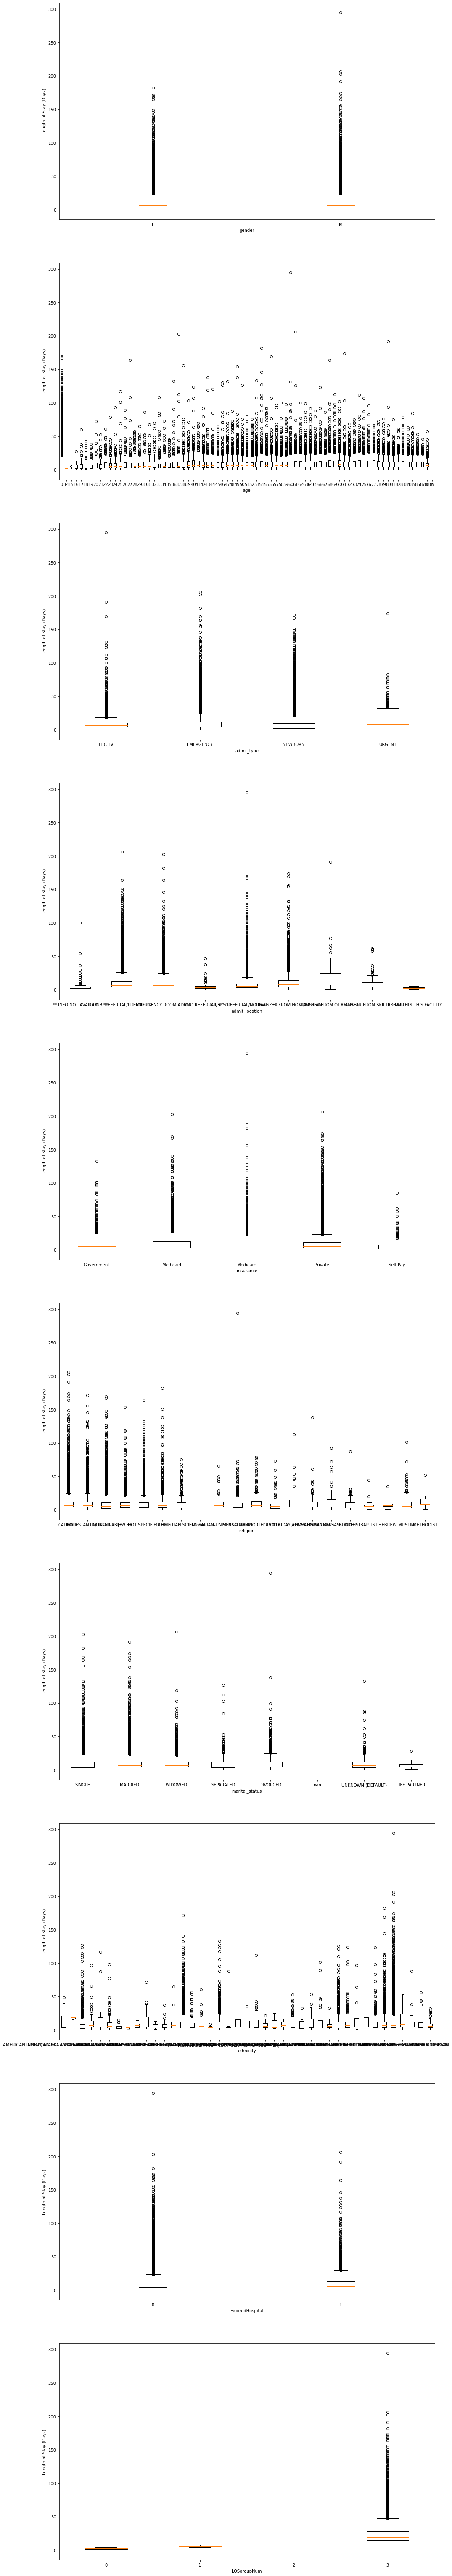

In [85]:
discrete_variables = ['gender', 'age', 'admit_type', 'admit_location', 'insurance', 'religion', 'marital_status',
                      'ethnicity', 'ExpiredHospital', 'LOSgroupNum']
# didn't include AdmitDiagnosis and AdmitProcedure

discrete_figures, discrete_axes = plt.subplots(10, figsize = (16, 112)) # 8 * 14 = 112
for counter in range(10):
    if (counter == 5 or counter == 6):
        variables = pd.unique(mimic_train[discrete_variables[counter]])
    else:
        variables = sorted(pd.unique(mimic_train[discrete_variables[counter]]))
        
    LOS_by_variable = []
    for variable in variables:
        LOS_by_variable.append(list(mimic_train[mimic_train[discrete_variables[counter]] == variable]['LOSdays']))
        
    discrete_axes[counter].boxplot(LOS_by_variable)
    discrete_axes[counter].set_xlabel(discrete_variables[counter])
    discrete_axes[counter].set_ylabel("Length of Stay (Days)")
    discrete_axes[counter].set_xticklabels(variables)

In [86]:
sorted(pd.unique(mimic_train.admit_location))

['** INFO NOT AVAILABLE **',
 'CLINIC REFERRAL/PREMATURE',
 'EMERGENCY ROOM ADMIT',
 'HMO REFERRAL/SICK',
 'PHYS REFERRAL/NORMAL DELI',
 'TRANSFER FROM HOSP/EXTRAM',
 'TRANSFER FROM OTHER HEALT',
 'TRANSFER FROM SKILLED NUR',
 'TRSF WITHIN THIS FACILITY']

In [87]:
sorted(pd.unique(mimic_train.ethnicity))

['AMERICAN INDIAN/ALASKA NATIVE',
 'AMERICAN INDIAN/ALASKA NATIVE FEDERALLY RECOGNIZED TRIBE',
 'ASIAN',
 'ASIAN - ASIAN INDIAN',
 'ASIAN - CAMBODIAN',
 'ASIAN - CHINESE',
 'ASIAN - FILIPINO',
 'ASIAN - JAPANESE',
 'ASIAN - KOREAN',
 'ASIAN - OTHER',
 'ASIAN - THAI',
 'ASIAN - VIETNAMESE',
 'BLACK/AFRICAN',
 'BLACK/AFRICAN AMERICAN',
 'BLACK/CAPE VERDEAN',
 'BLACK/HAITIAN',
 'CARIBBEAN ISLAND',
 'HISPANIC OR LATINO',
 'HISPANIC/LATINO - CENTRAL AMERICAN (OTHER)',
 'HISPANIC/LATINO - COLOMBIAN',
 'HISPANIC/LATINO - CUBAN',
 'HISPANIC/LATINO - DOMINICAN',
 'HISPANIC/LATINO - GUATEMALAN',
 'HISPANIC/LATINO - HONDURAN',
 'HISPANIC/LATINO - MEXICAN',
 'HISPANIC/LATINO - PUERTO RICAN',
 'HISPANIC/LATINO - SALVADORAN',
 'MIDDLE EASTERN',
 'MULTI RACE ETHNICITY',
 'NATIVE HAWAIIAN OR OTHER PACIFIC ISLANDER',
 'OTHER',
 'PATIENT DECLINED TO ANSWER',
 'PORTUGUESE',
 'SOUTH AMERICAN',
 'UNABLE TO OBTAIN',
 'UNKNOWN/NOT SPECIFIED',
 'WHITE',
 'WHITE - BRAZILIAN',
 'WHITE - EASTERN EUROPEAN',
 'WHI

In [88]:
ages = sorted(pd.unique(mimic_train.age))
LOS_by_age = []
for age in ages:
    LOS_by_age.append(list(mimic_train[mimic_train['age'] == age]['LOSdays']))

Text(0, 0.5, 'Length of Stay (Days)')

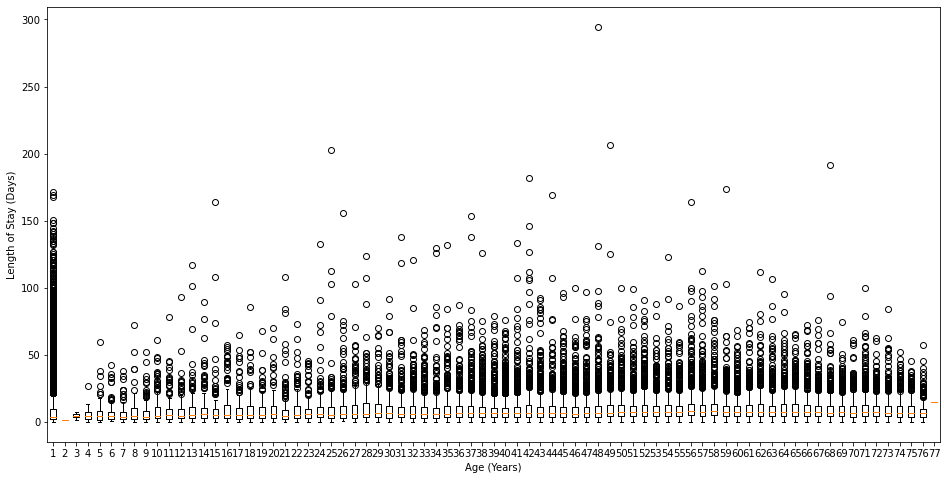

In [89]:
plt.figure(figsize = (16, 8))
plt.boxplot(LOS_by_age)
plt.xlabel('Age (Years)')
plt.ylabel('Length of Stay (Days)')

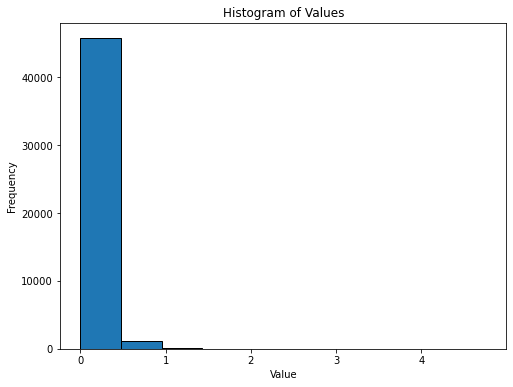

In [92]:
plt.figure(figsize=(8, 6))
plt.hist(mimic_train['NumCallouts'], bins=10, edgecolor='black')
plt.title('Histogram of Values')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

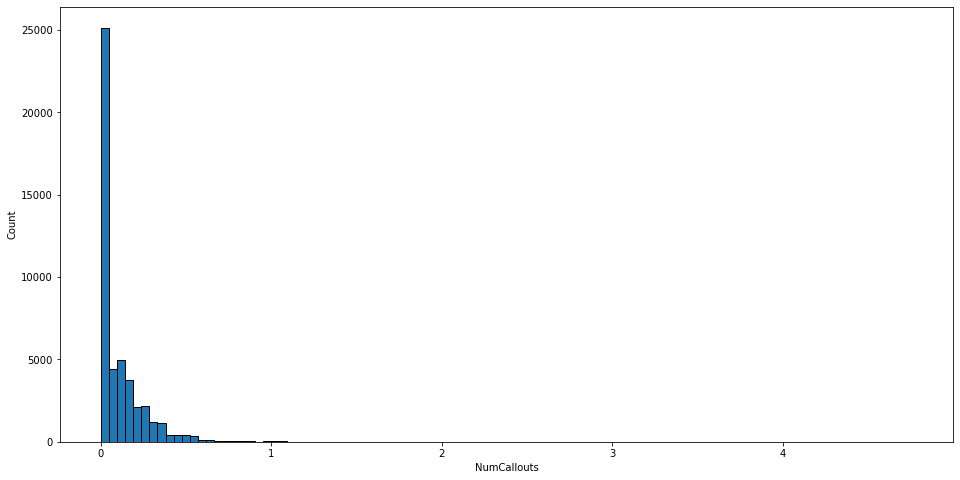

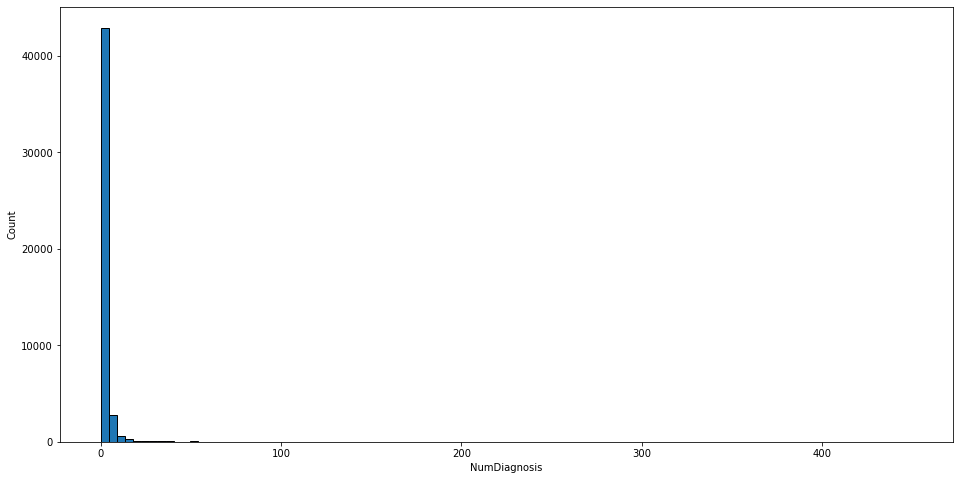

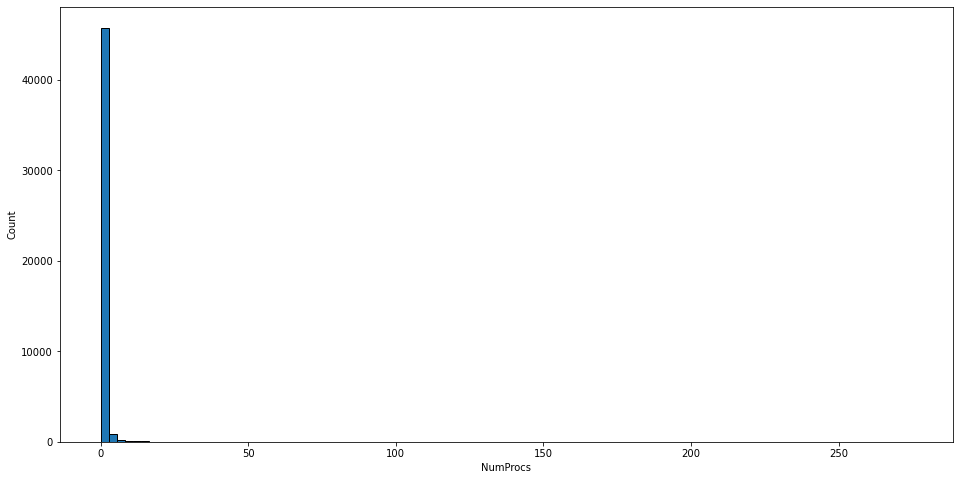

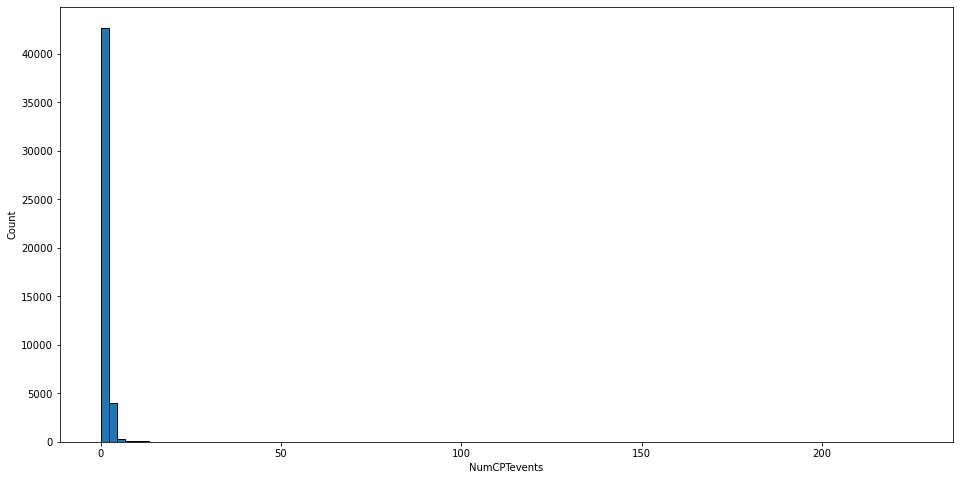

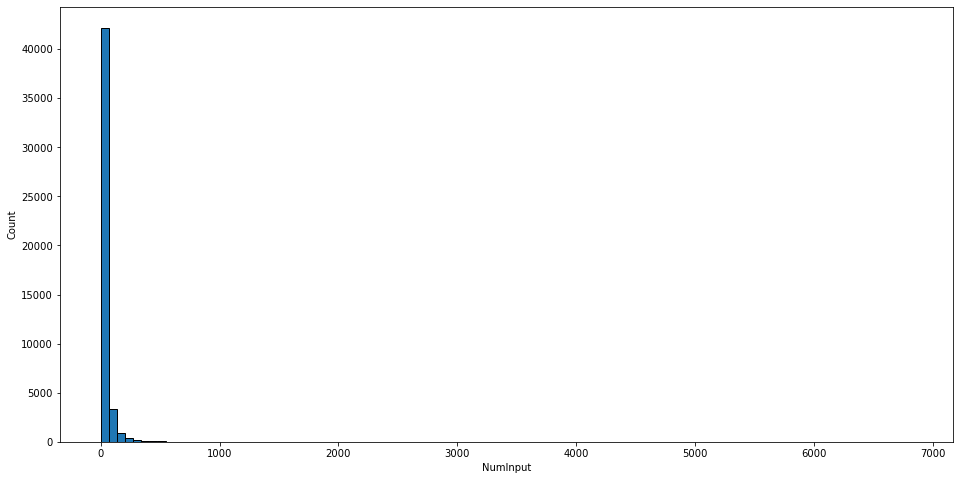

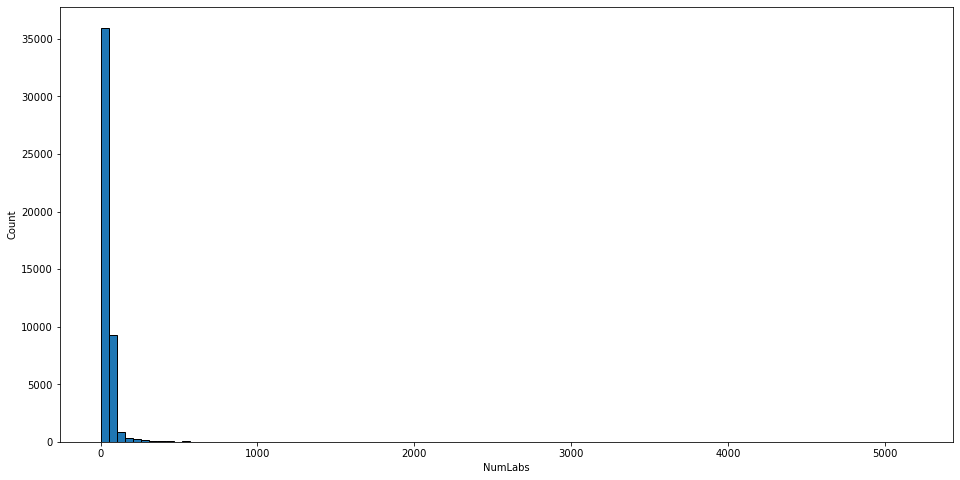

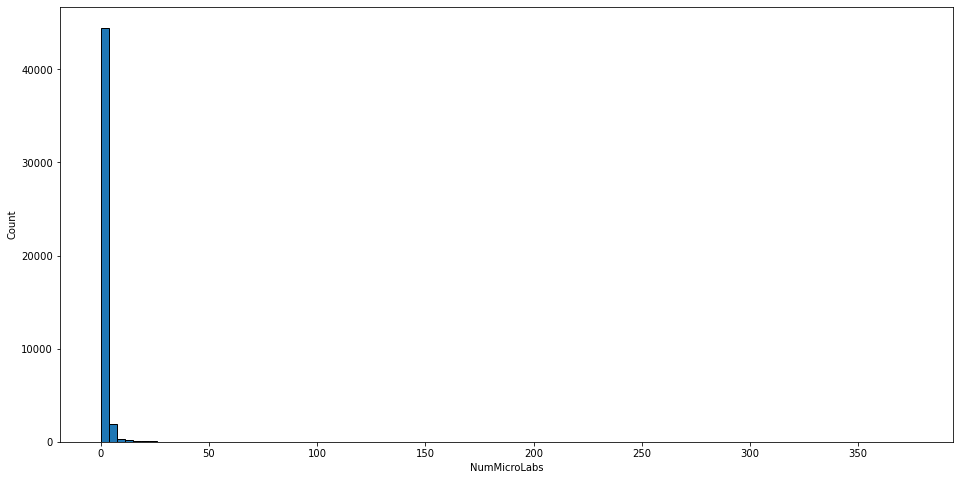

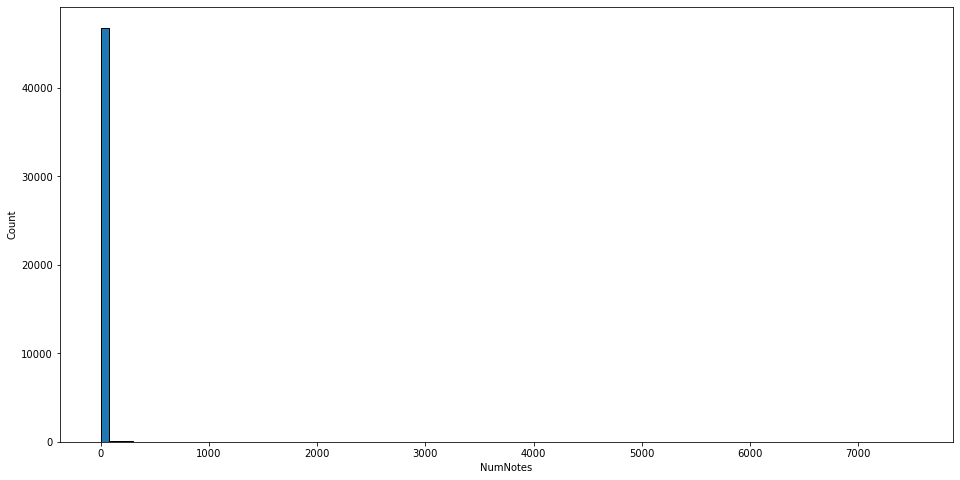

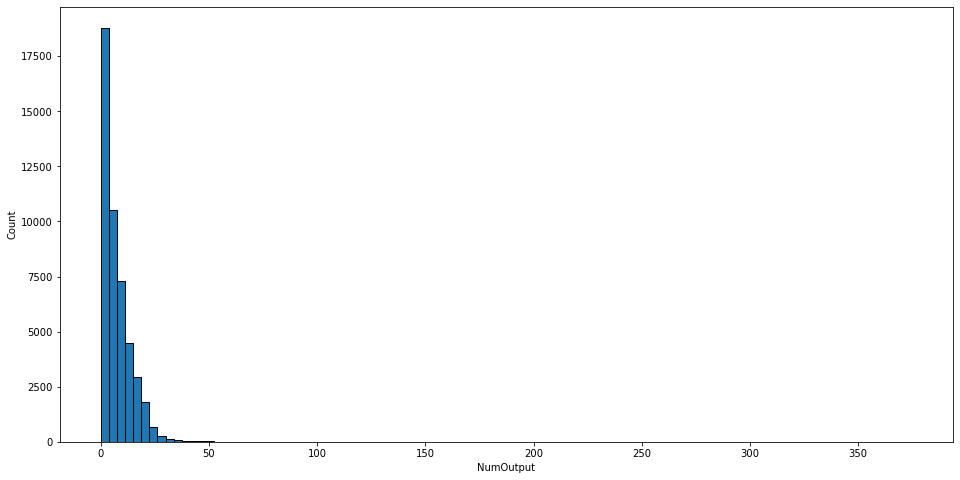

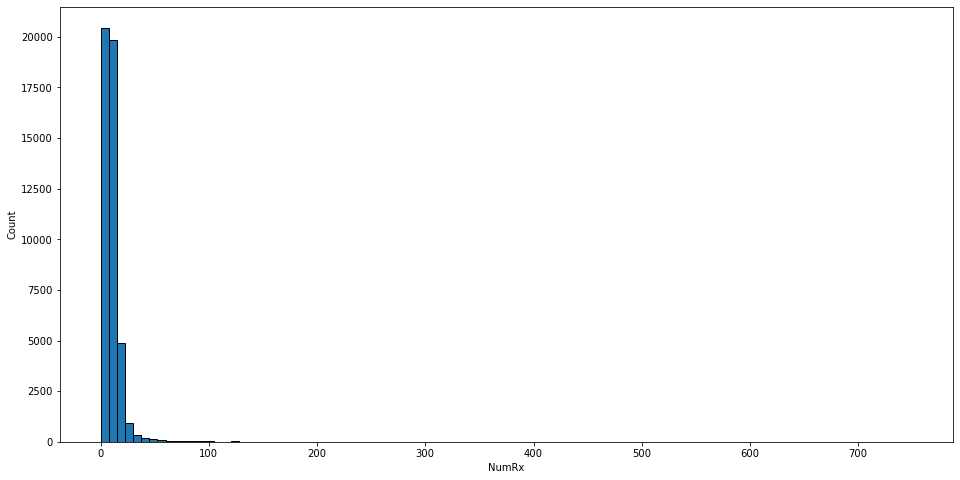

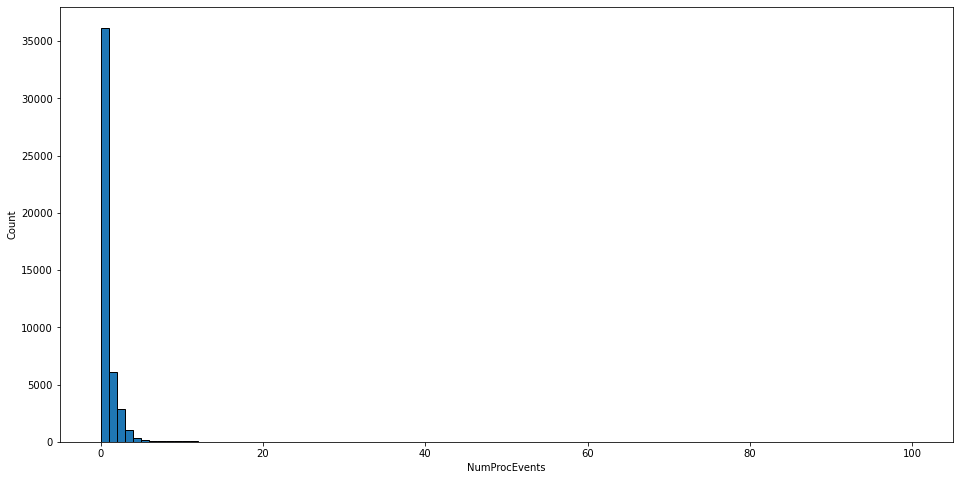

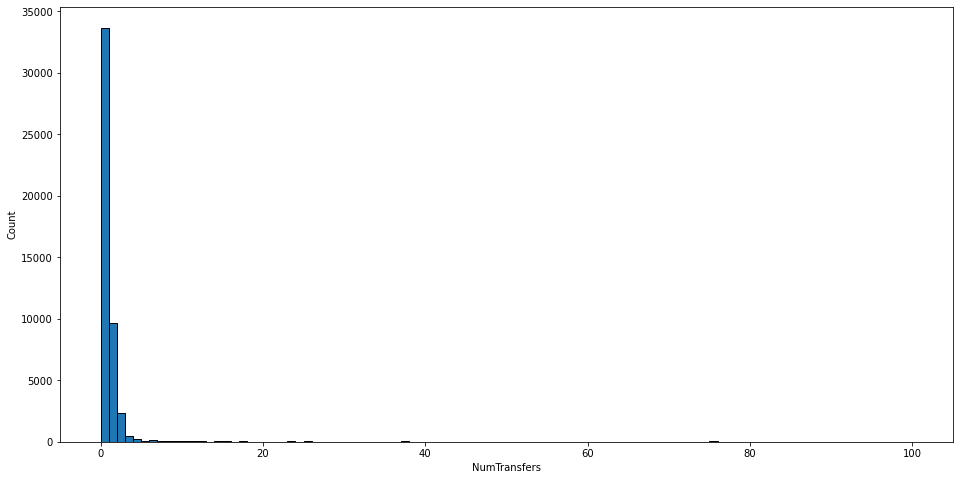

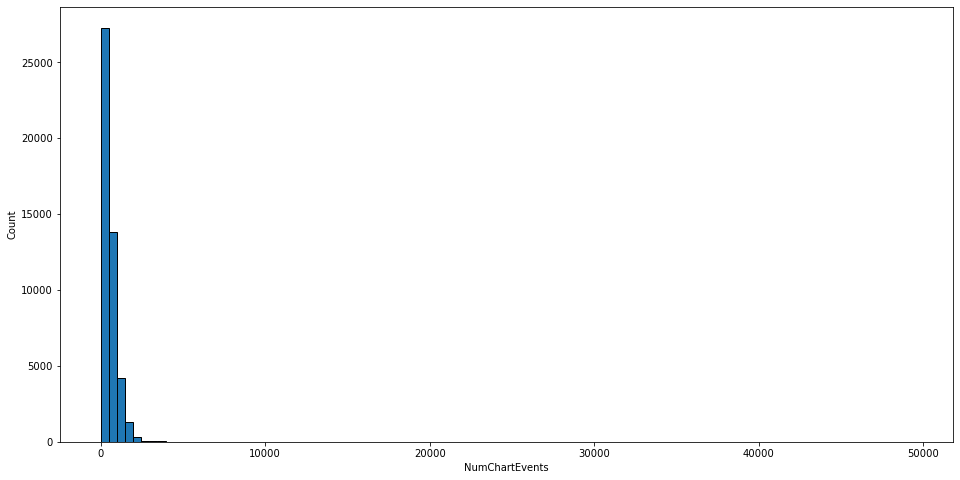

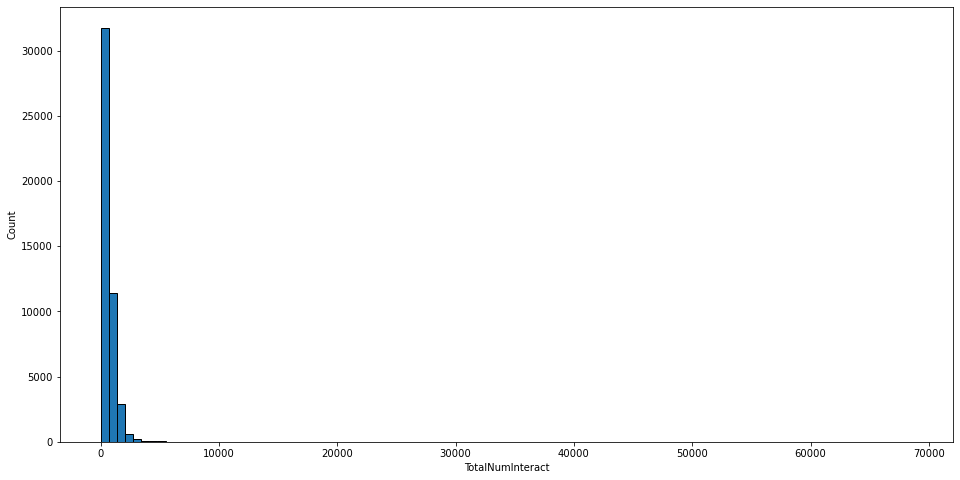

In [95]:
for counter in range(14):
    plt.figure(figsize = (16, 8))
    plt.hist(mimic_train[continuous_variables[counter]], edgecolor = "black", bins = 100)
    plt.xlabel(continuous_variables[counter])
    plt.ylabel('Count')
    plt.show()

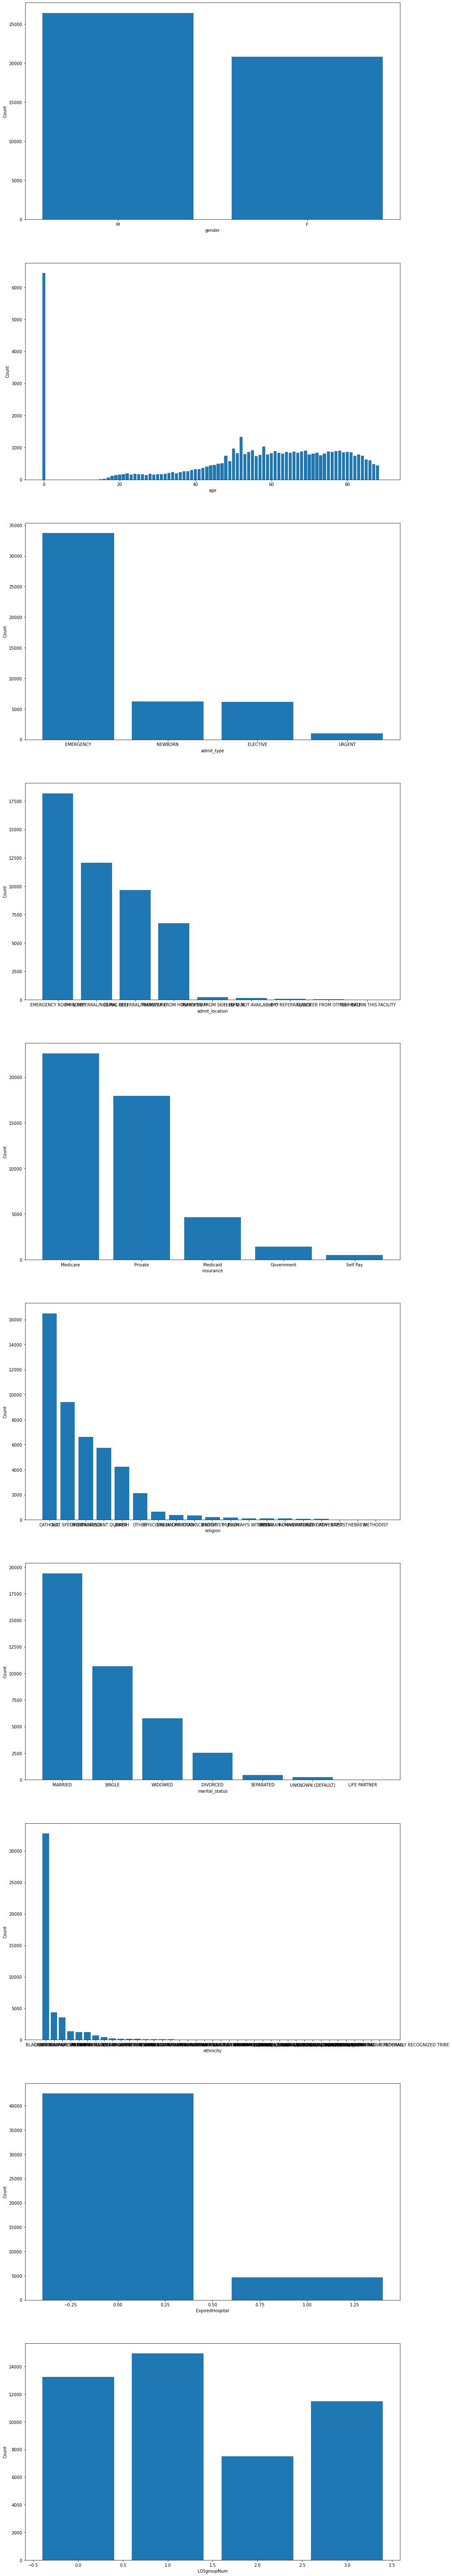

In [97]:
discrete_figures_counts, discrete_axes_counts = plt.subplots(10, figsize = (16, 112)) # 8 * 14 = 112
for counter in range(10):
    counts = mimic_train[discrete_variables[counter]].value_counts()
    discrete_axes_counts[counter].bar(counts.index, counts.values)
    discrete_axes_counts[counter].set_xlabel(discrete_variables[counter])
    discrete_axes_counts[counter].set_ylabel('Count')